In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

(100, 2)

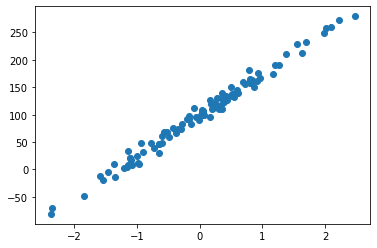

In [2]:
np.random.seed(4)
n=1
m = 100
x, y = make_regression(n_samples=m, n_features=n, noise=10)
y = y + 100
plt.scatter(x, y)
y = y.reshape(y.shape[0], 1)
#ajouter le Bias a X
X = np.hstack((np.ones(x.shape), x))
X.shape

In [3]:
#definir la fonction modele
def model(X, theta):
# x shape: (m, n)
# theta shape: (n,1)
    return X.dot(theta) #shape: (m, 1)
#definir la fonction cout
def cost_function(X, y, theta):
    m = len(y)
    J = 1/(2*m) * np.sum((model(X, theta) - y)**2)
    return J
#definit la fonction gradient
def gradient(X, y, theta):
    return 1/m * X.T.dot((X.dot(theta) - y))

In [4]:
#algorithme de Gradient Descent
def gradient_descent(X, y, theta, learning_rate =0.001, iterations = 1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for i in range(0, iterations):
        prediction = model(X, theta)
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        theta_history[i,:] = theta.T
    return theta, cost_history, theta_history

In [6]:
# utilisation de l'algorithme
np.random.seed(0)
theta = np.random.randn(2, 1)
iterations = 10
learning_rate = 0.3
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate=learning_rate, iterations = iterations)

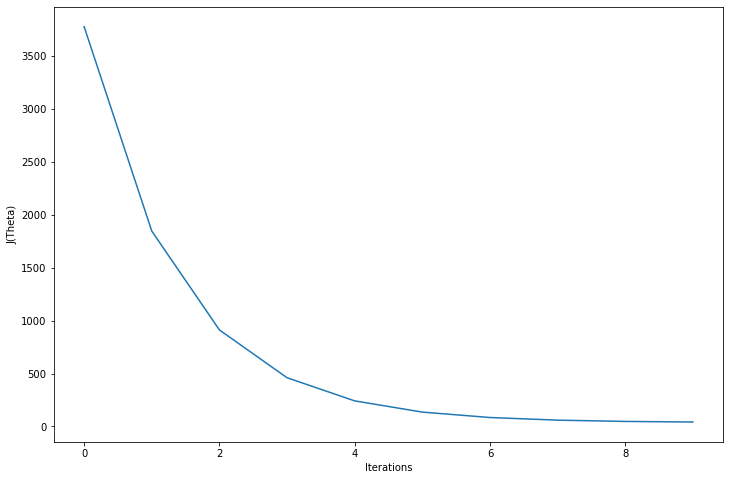

In [7]:
#visualisation des courbes d'apprentissage
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),cost_history)

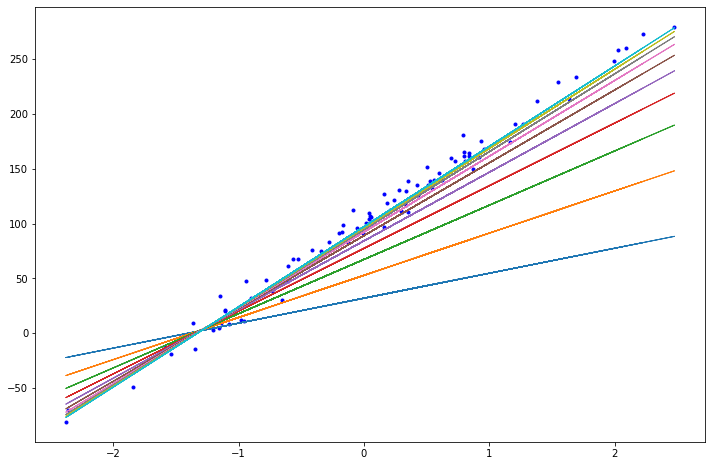

In [8]:
# visualisation du modele au cours de son apprentissage
fig,ax = plt.subplots(figsize=(12,8))
_=ax.plot(x, y, 'b.')
for i in range(iterations):
    _=ax.plot(x, model(X, theta_history[i]), lw=1)